## Heirarchical Drift Diffusion Model Analysis

In this script, we fit a version of the diffusion model that takes participant-level variabibility into account. As Wiecki et al. (2013) put it, 

"Hierarchical Bayesian methods provide a remedy for this problem by allowing group and subject parameters to be estimated simultaneously at different hierarchical levels ([LeeWagenmakers13], [Kruschke10], [VandekerckhoveTuerlinckxLee11]). Subject parameters are assumed to be drawn from a group distribution, and to the degree that subject are similar to each other, the variance in the group distribution will be estimated to be small, which reciprocally has a greater influence on constraining parameter estimates of any individual. Even in this scenario, the method still allows the posterior for any given individual subject to differ substantially from that of the rest of the group given sufficient data to overwhelm the group prior. Thus the method capitalizes on statistical strength shared across the individuals, and can do so to different degrees even within the same sample and model, depending on the extent to which subjects are similar to each other in one parameter vs. another."

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hddm

/Users/kmacdonald/anaconda3/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [9]:
# Loading and arranging data for analysis
data = hddm.load_csv("../../../data/3_final_merged_data/speed-acc-ss-df.csv")
data = data.dropna(subset = ['RT'])
data['subj_idx'] = data['Sub.Num']
data['stimuli'] = np.where(data['stimuli'] == "V1", "ASL", data['stimuli'])
data['stimuli'] = np.where(data['stimuli'] == "V2", "ASL", data['stimuli'])
data['stimuli'] = np.where(data['stimuli'] == "Trio", "Object", data['stimuli'])
data['stimuli'] = np.where(data['stimuli'] == "Bull", "Bullseye", data['stimuli'])
data['rt'] = data['RT_sec']
data['response'] = data['correct']

In [90]:
# Separate adult and kid data
data_kids = data[data.age_code == "child"]
# filter to remove extreme RTs
data_kids = data_kids[(data_kids.rt >= 0.3) & (data_kids.rt <= 2)]

In [91]:
data_kids = hddm.utils.flip_errors(data_kids)
data_kids.head(10)

Sub.Num  Months  Tr.Num stimuli experiment age_code  \
138    30010      44       2     ASL        ASl    child   
139    30010      44       3     ASL        ASl    child   
140    30010      44       4     ASL        ASl    child   
141    30010      44       5     ASL        ASl    child   
142    30010      44       6     ASL        ASl    child   
143    30010      44       7     ASL        ASl    child   
144    30010      44       8     ASL        ASl    child   
145    30010      44       9     ASL        ASl    child   
146    30010      44      11     ASL        ASl    child   
147    30010      44      12     ASL        ASl    child   

    hearing_status_participant  Prescreen.Notes language_modality trial_type  \
138                    hearing              NaN               ASL        C_T   
139                    hearing              NaN               ASL        C_T   
140                    hearing              NaN               ASL        C_T   
141                    hearing              NaN               ASL        C_T   
142                    hearing              NaN               ASL        C_T   
143                    hearing              NaN               ASL        C_T   
144                    hearing              NaN               ASL        C_D   
145                    hearing              NaN               ASL        C_D   
146                    hearing              NaN               ASL        C_T   
147                    hearing              NaN               ASL        C_T   

         RT  age_years  RT_sec  correct  subj_idx     rt  response  
138  1133.0   3.666667   1.133        1     30010  1.133         1  
139  1000.0   3.666667   1.000        1     30010  1.000         1  
140  1333.0   3.666667   1.333        1     30010  1.333         1  
141   967.0   3.666667   0.967        1     30010  0.967         1  
142  1000.0   3.666667   1.000        1     30010  1.000         1  
143  1133.0   3.666667   1.133        1     30010  1.133         1  
144   933.0   3.666667   0.933        0     30010 -0.933         0  
145  1400.0   3.666667   1.400        0     30010 -1.400         0  
146  1567.0   3.666667   1.567        1     30010  1.567         1  
147  1433.0   3.666667   1.433        1     30010  1.433         1

In [92]:
m = hddm.HDDM(data_kids)
m.find_starting_values()
m.sample(2000, burn = 20)

/Users/kmacdonald/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 2000 of 2000 complete in 302.5 sec

/Users/kmacdonald/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [93]:
stats = m.gen_stats()
stats.head(10)

/Users/kmacdonald/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


mean        std      2.5q       25q       50q       75q  \
a            1.5293  0.0362119   1.45827   1.50609   1.52903   1.55272   
a_std      0.246067    0.03754  0.177253  0.220053  0.245576  0.271203   
a_subj.9     1.5283   0.156844   1.25073   1.41918   1.51964   1.62937   
a_subj.10   1.40816   0.151306    1.1329   1.29819   1.40243   1.50541   
a_subj.11   1.40295   0.180645   1.08759   1.27842   1.39377   1.52112   
a_subj.12   1.41518   0.172463   1.09171   1.29603   1.40619   1.52428   
a_subj.15   1.28494   0.140364   1.02937   1.18623   1.27799   1.37643   
a_subj.16   1.49032   0.162425   1.19784   1.37368   1.48104   1.60171   
a_subj.18   1.58663   0.150001   1.32377   1.48099   1.57854   1.68593   
a_subj.19   1.51277   0.144408   1.25143   1.41271    1.5053    1.6063   

              97.5q      mc err  
a           1.60035  0.00159608  
a_std      0.319741  0.00245437  
a_subj.9    1.86534  0.00440448  
a_subj.10   1.72211  0.00421409  
a_subj.11    1.7947  0.00526131  
a_subj.12   1.77355  0.00596518  
a_subj.15   1.57687  0.00449117  
a_subj.16   1.83823  0.00506853  
a_subj.18   1.90007  0.00455435  
a_subj.19   1.80563  0.00384959

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std


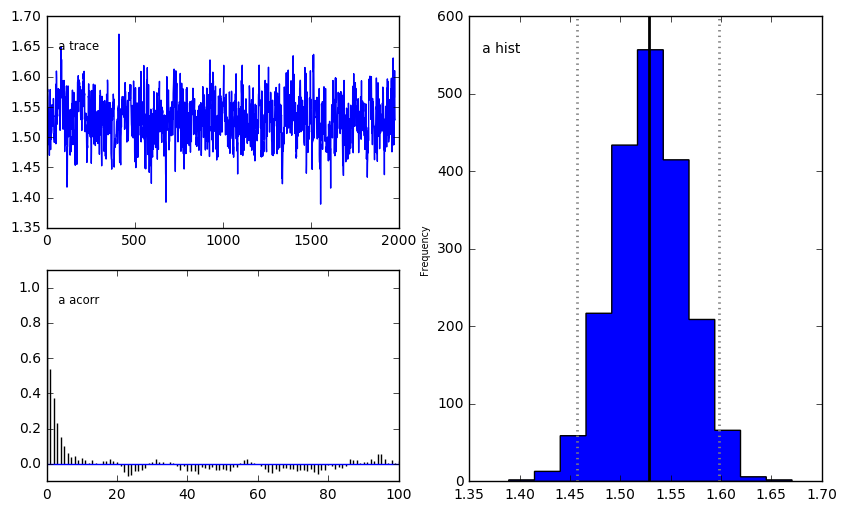

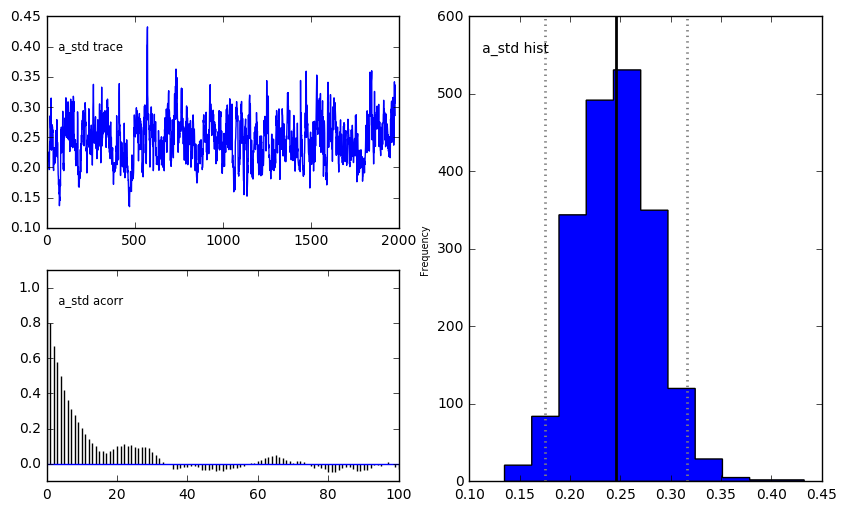

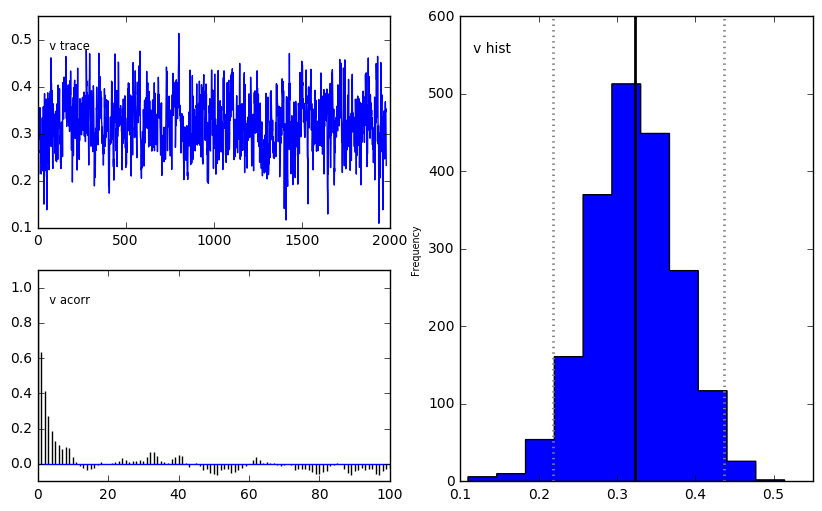

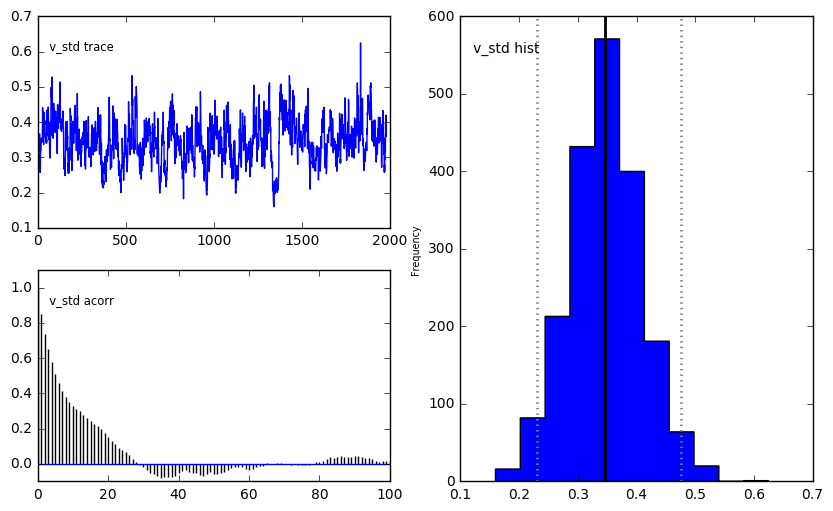

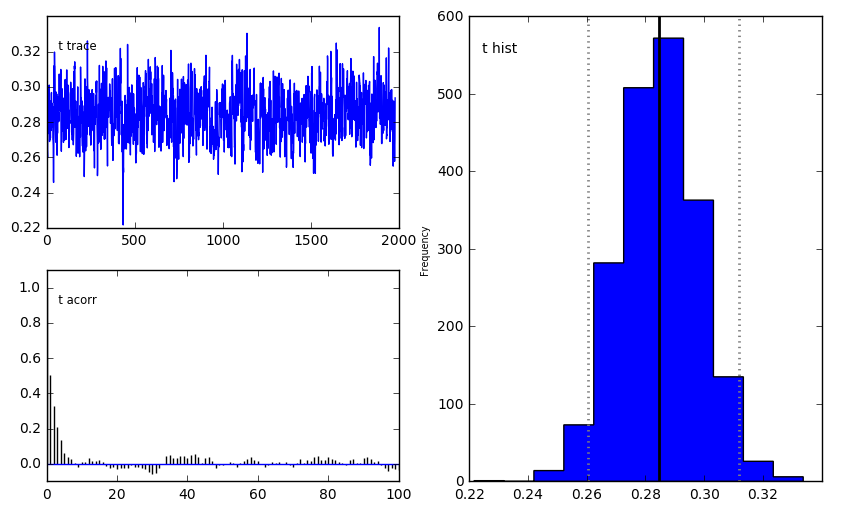

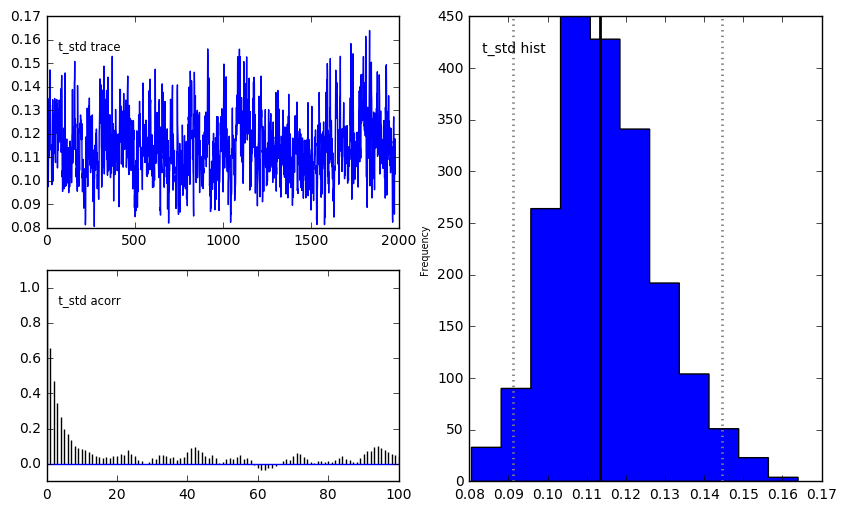

In [96]:
%matplotlib inline
m.plot_posteriors()

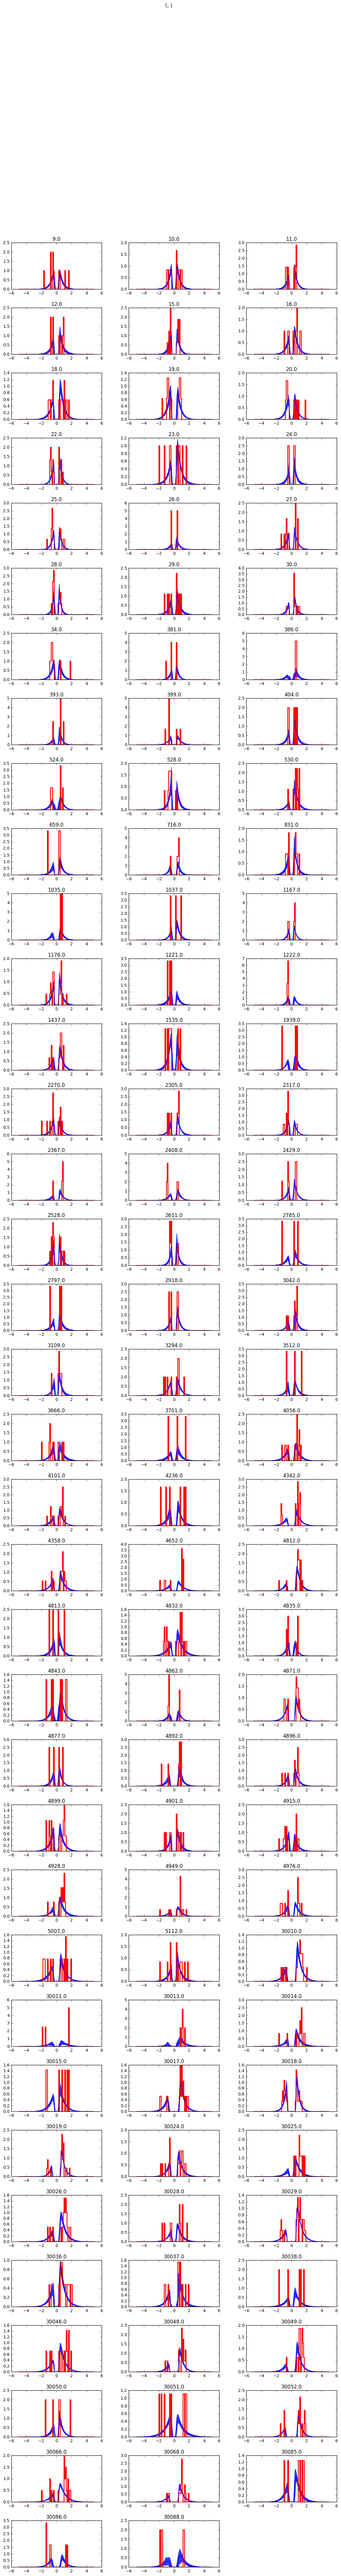

In [98]:
m.plot_posterior_predictive(figsize=(14, 100))

## Fit variable drift model

Here we fit the ddm for each participant, but now we allow the drift rate to vary across the four conditions. We also consider the possibility that 5% of the data could be generated by a different process (i.e., outliers). From the HDDM documentation:

"What we can do instead is fit a mixture model which assumes that outliers come from a uniform distribution. (Note, outliers do not have to be very fast or very slow, and the above example is just an obvious illustration. Some proportion of the trials can be assumed to simply come from a different process for which we make no assumptions about its generation, and hence use a uniform distribution. This allows the model to find the best DDM parameters that capture the majority of trials). Here, we specify that we expect roughly 5% outliers in our data."

In [69]:
m_stim = hddm.HDDM(data_kids, depends_on={'v': 'stimuli', 'a': 'stimuli'}, p_outlier=.05)
m_stim.find_starting_values()
m_stim.sample(10000, burn=1000)

/Users/kmacdonald/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 10001 of 10000 complete in 1489.3 sec

/Users/kmacdonald/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


Plotting a(ASL)
Plotting a(Bullseye)
Plotting a(Face)
Plotting a(Object)
Plotting a_std
Plotting v(ASL)
Plotting v(Bullseye)
Plotting v(Face)
Plotting v(Object)
Plotting v_std
Plotting t
Plotting t_std


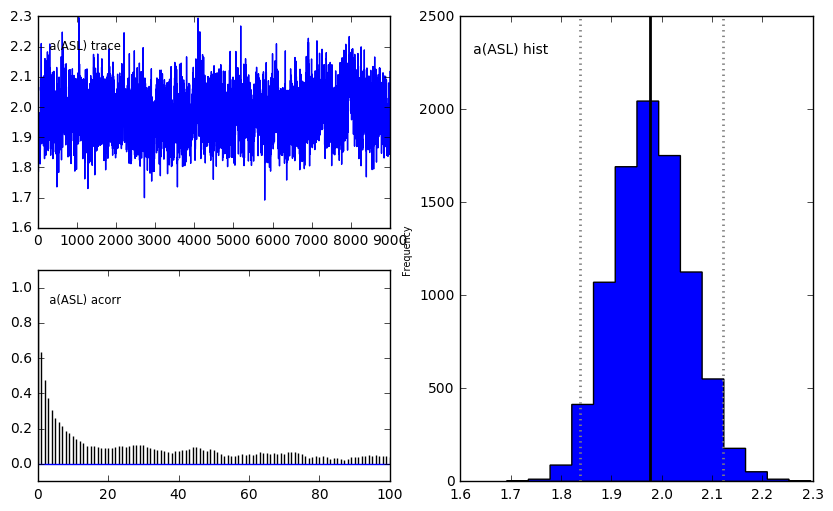

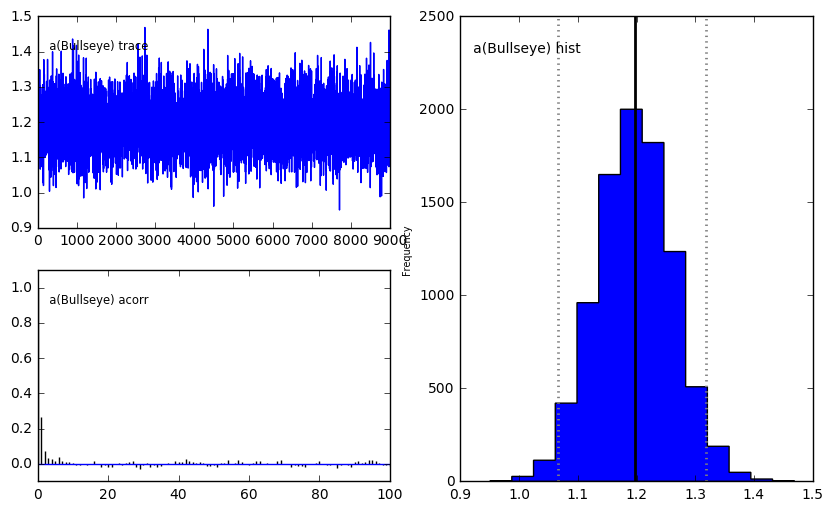

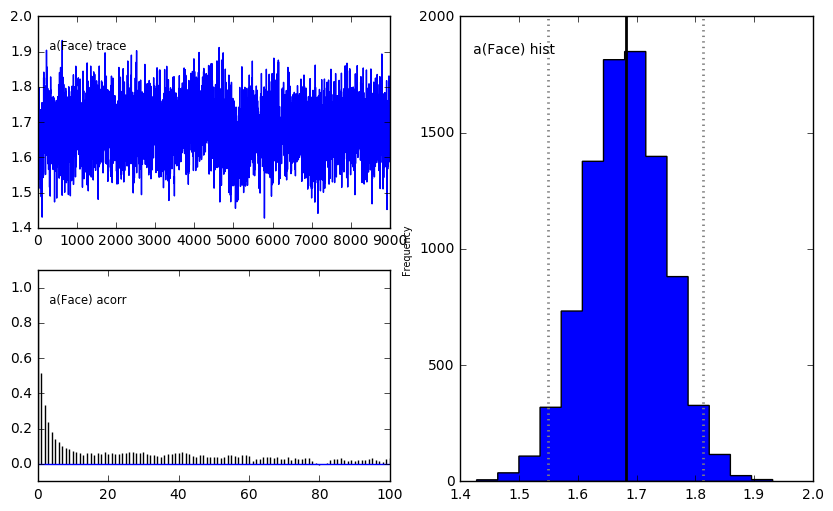

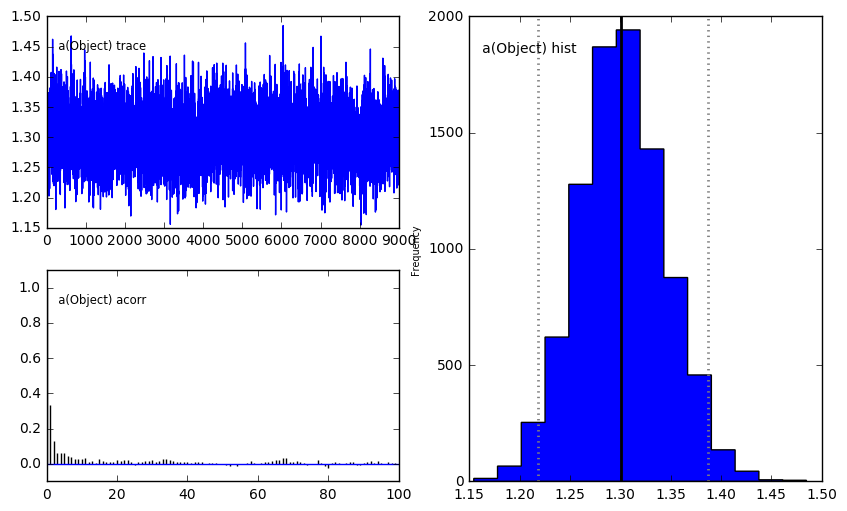

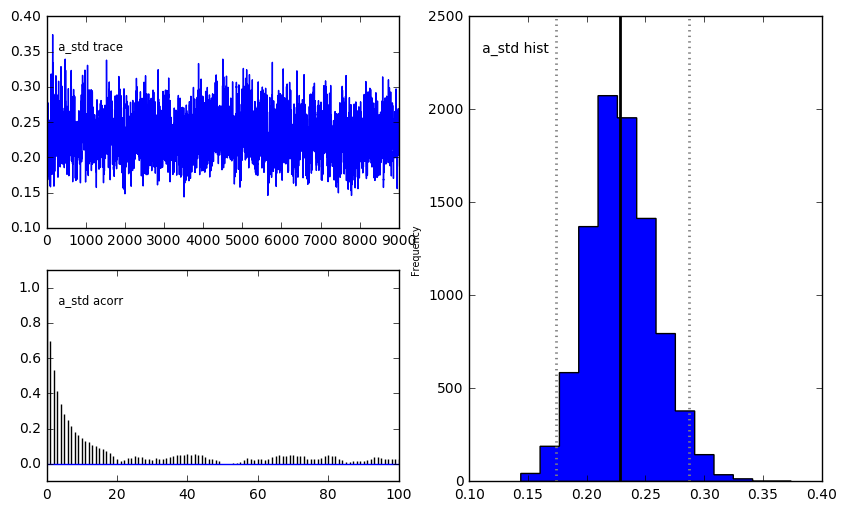

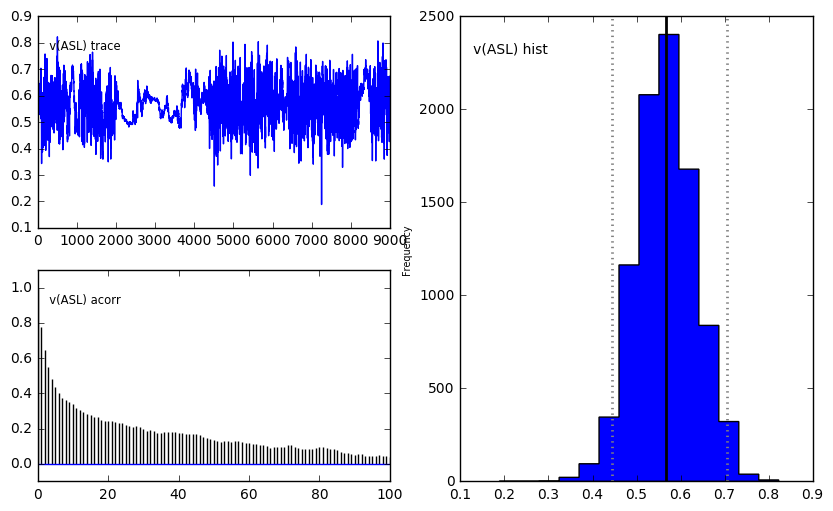

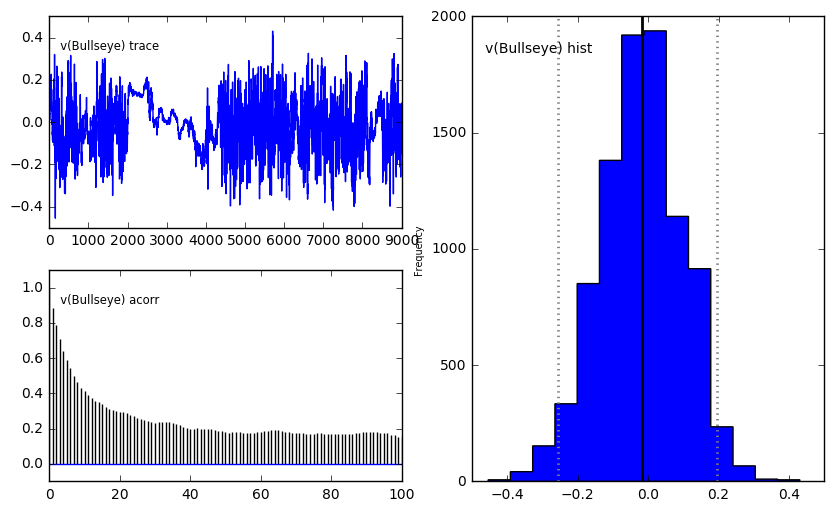

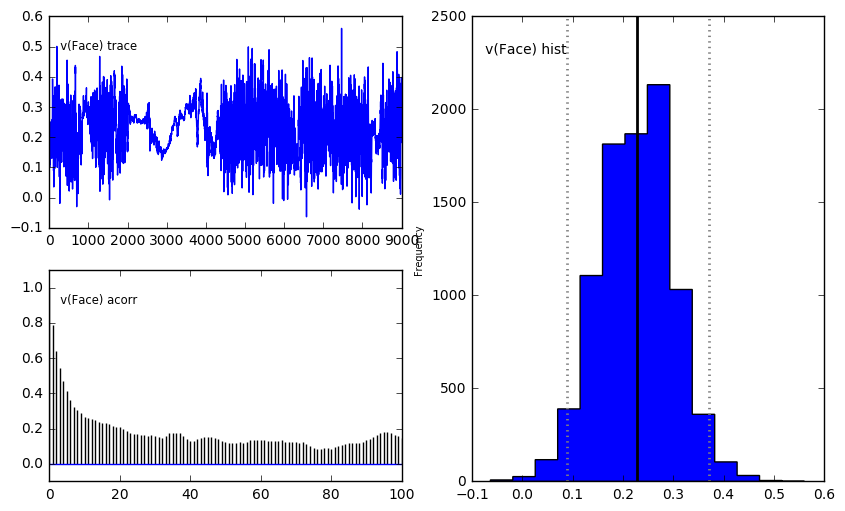

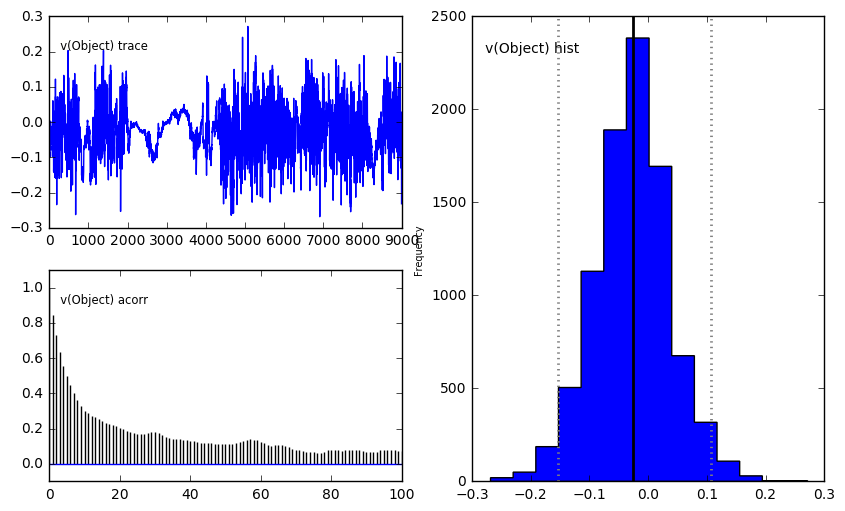

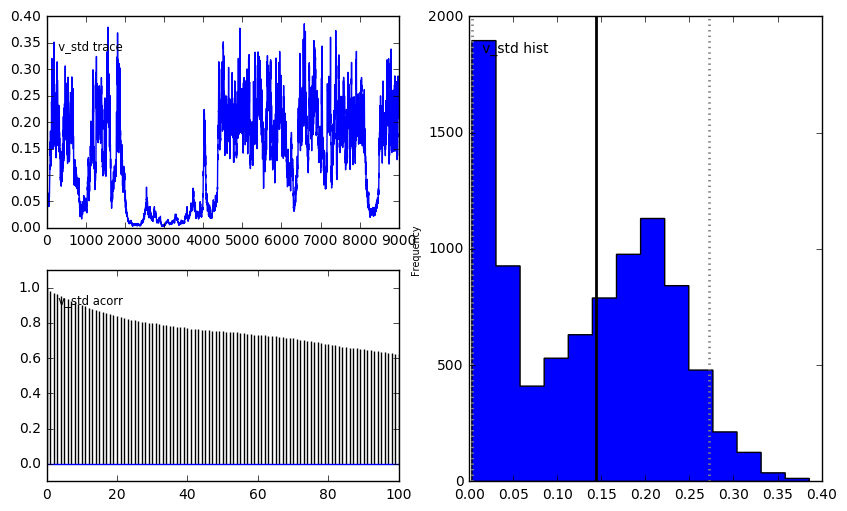

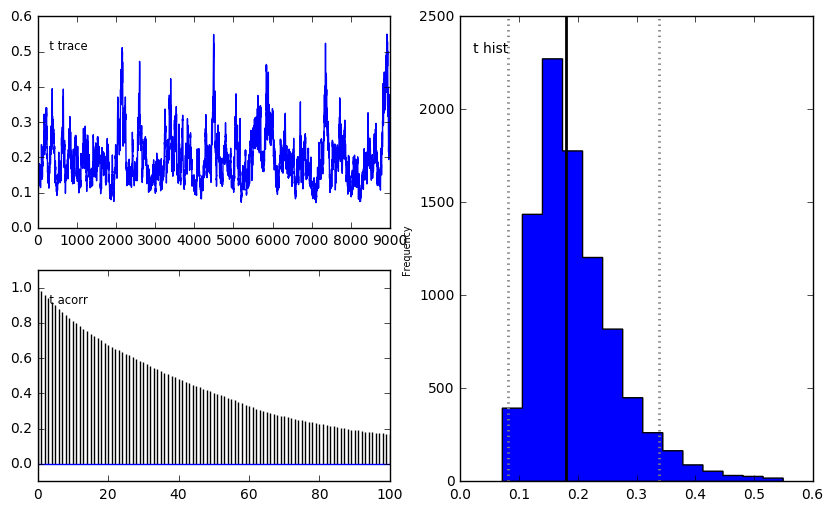

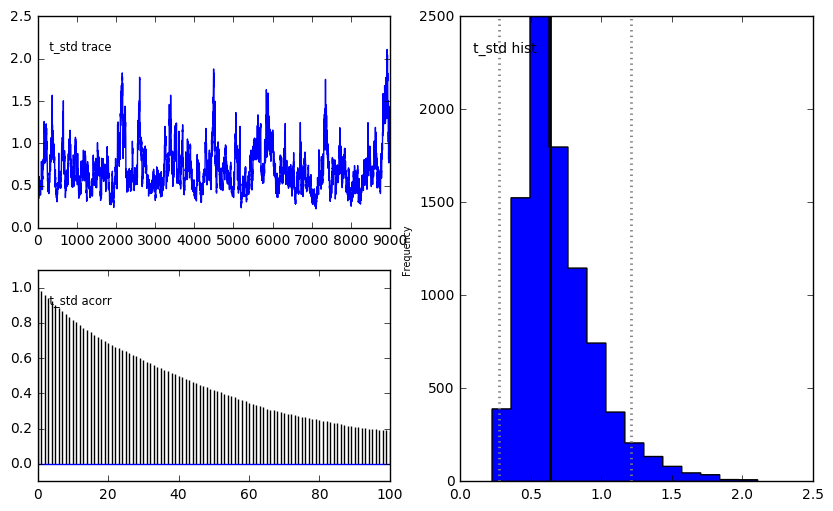

In [83]:
m_stim.plot_posteriors()

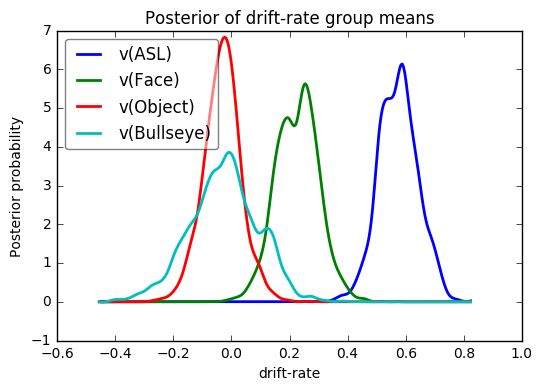

In [71]:
drift_ASL, drift_Face, drift_Obj, drift_Bull = m_stim.nodes_db.node[['v(ASL)', 'v(Face)', 'v(Object)', 'v(Bullseye)']]
hddm.analyze.plot_posterior_nodes([drift_ASL, drift_Face, drift_Obj, drift_Bull])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

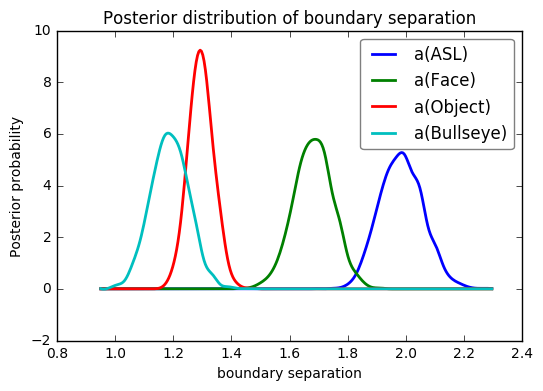

In [73]:
boundary_ASL, boundary_Face, boundary_Obj, boundary_Bull = m_stim.nodes_db.node[['a(ASL)', 'a(Face)', 'a(Object)', 'a(Bullseye)']]
hddm.analyze.plot_posterior_nodes([boundary_ASL, boundary_Face, boundary_Obj, boundary_Bull])
plt.xlabel('boundary separation')
plt.ylabel('Posterior probability')
plt.title('Posterior distribution of boundary separation')

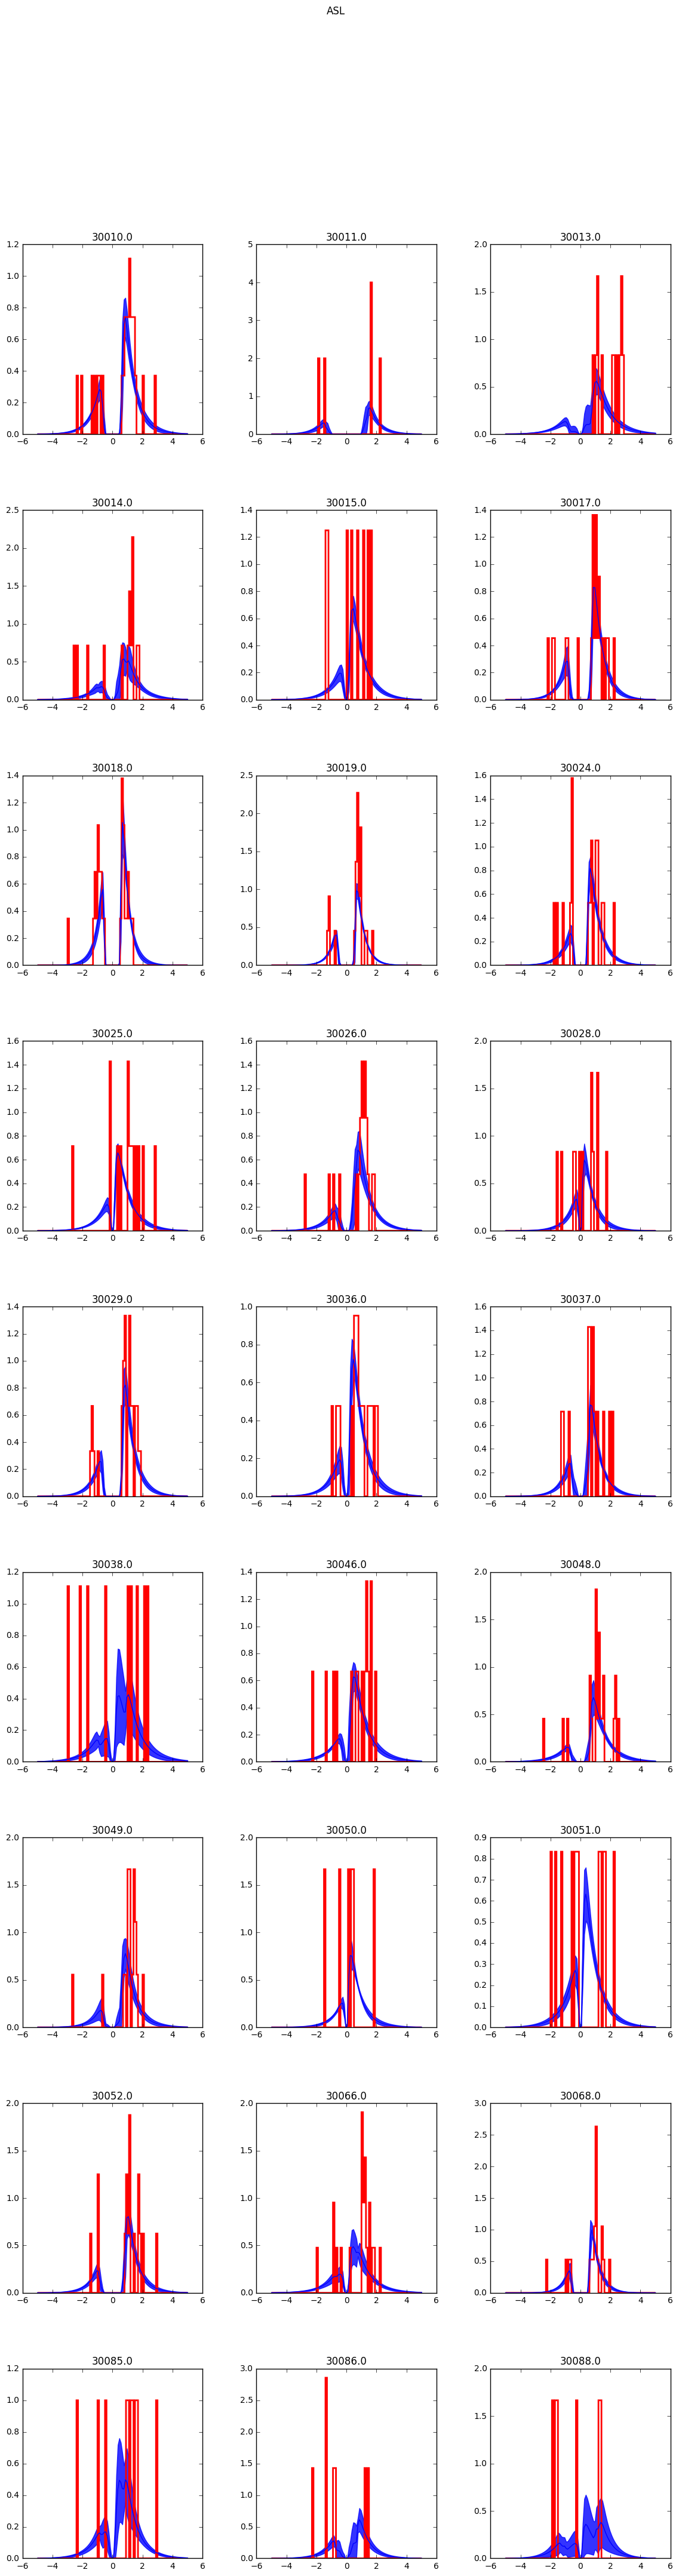

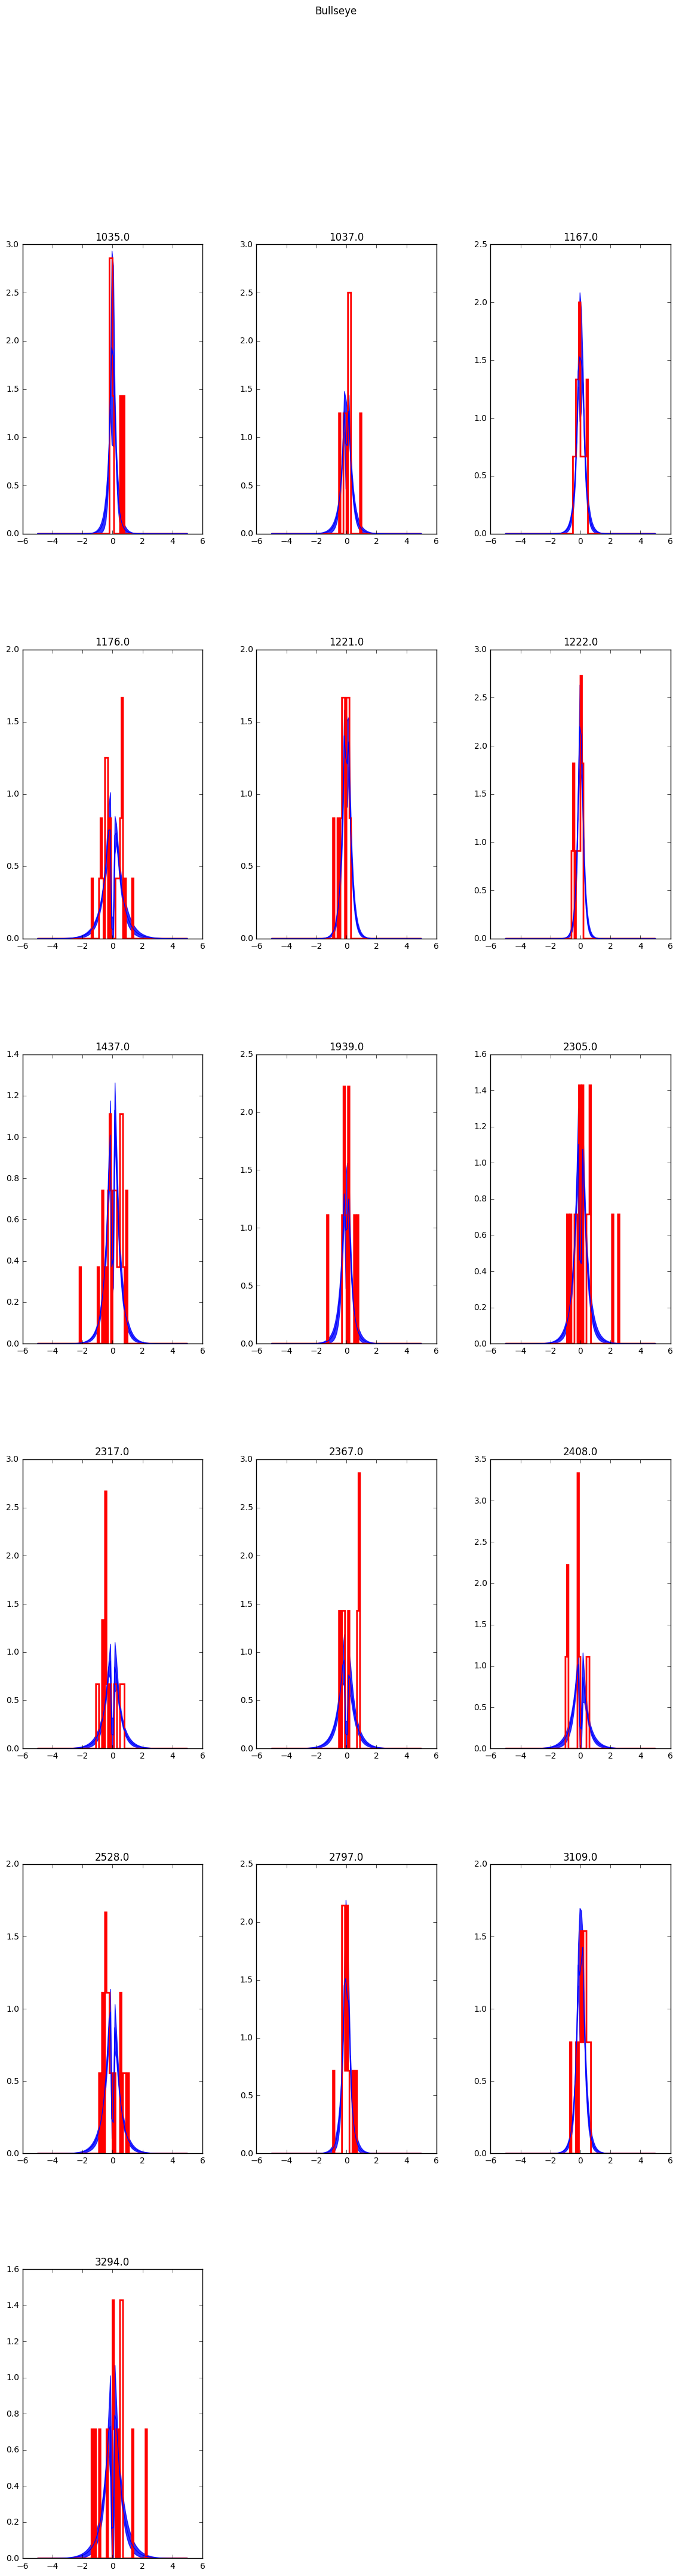

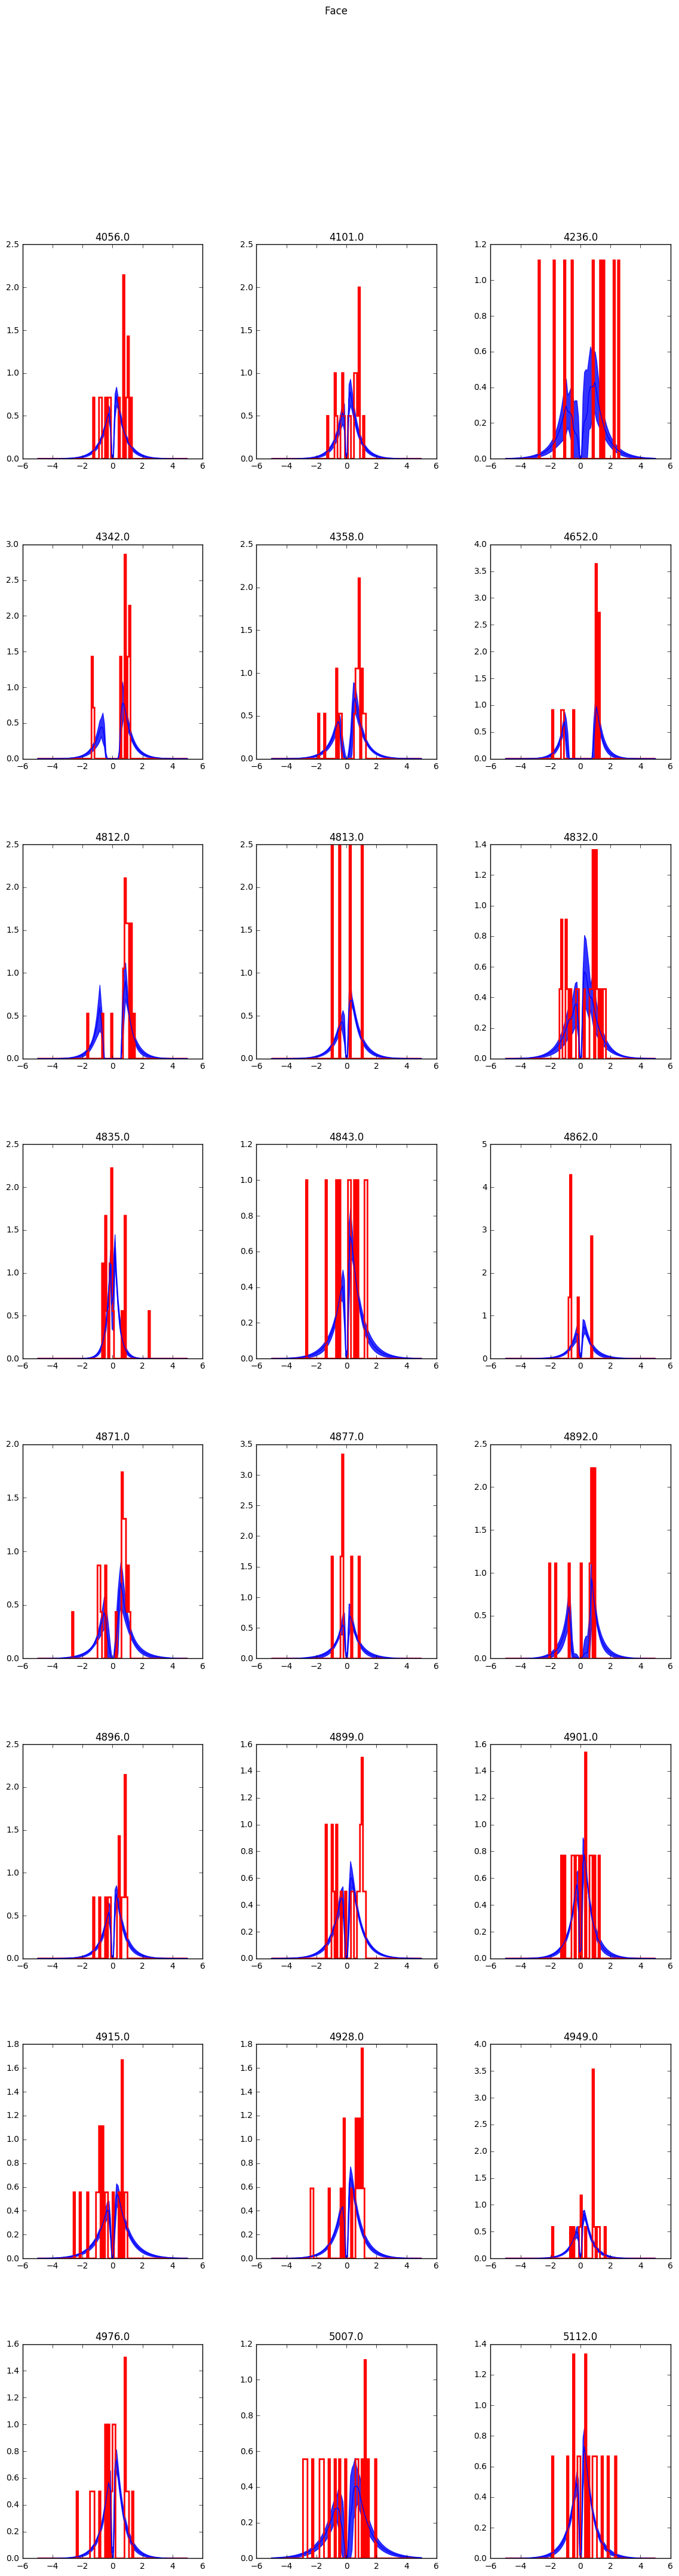

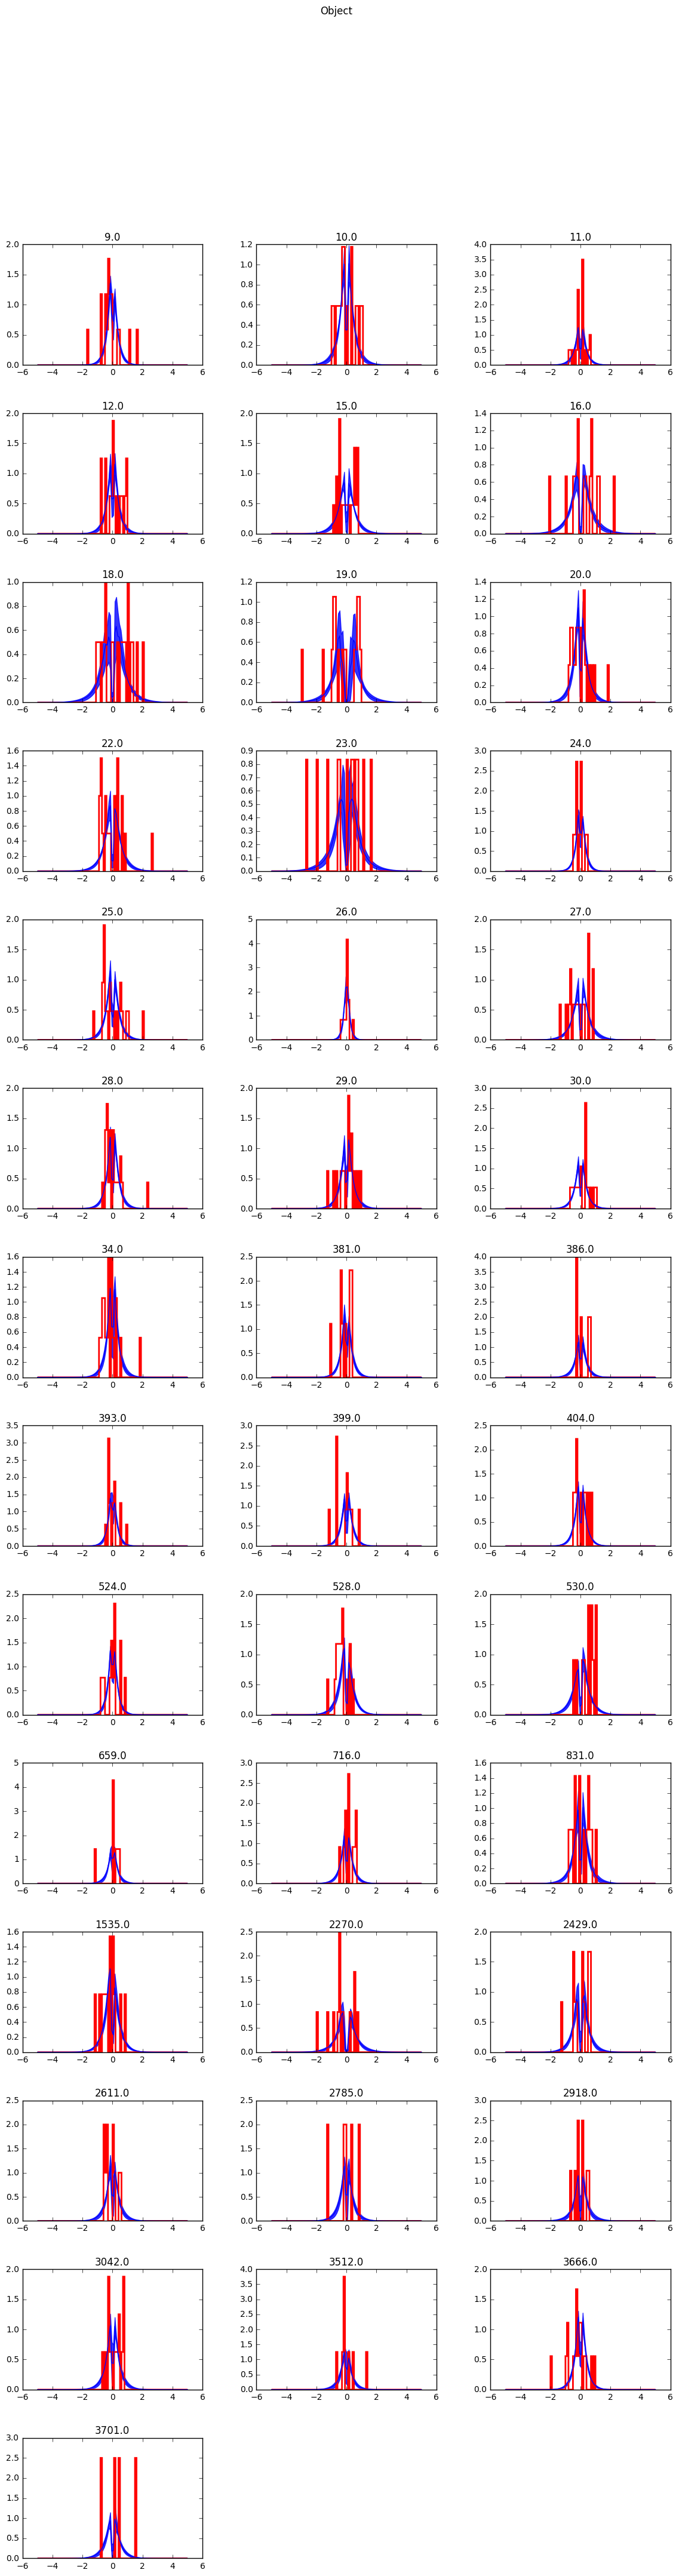

In [76]:
m_stim.plot_posterior_predictive(figsize=(14, 50))

## Fit "group-only" model

Here we don't estimate parameters for each individual participant to see if this helps model convergence.

In [108]:
m_group = hddm.HDDM(data_kids, depends_on={'v': 'stimuli', 'a': 'stimuli', 't': 'stimuli'}, 
                    p_outlier=.05, group_only_nodes=['v', 'a', 't'])
m_group.find_starting_values()
m_group.sample(1000, burn=100)

/Users/kmacdonald/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1000 of 1000 complete in 8.5 sec

/Users/kmacdonald/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


Plotting a(ASL)
Plotting a(Bullseye)
Plotting a(Face)
Plotting a(Object)
Plotting v(ASL)
Plotting v(Bullseye)
Plotting v(Face)
Plotting v(Object)
Plotting t(ASL)
Plotting t(Bullseye)
Plotting t(Face)
Plotting t(Object)


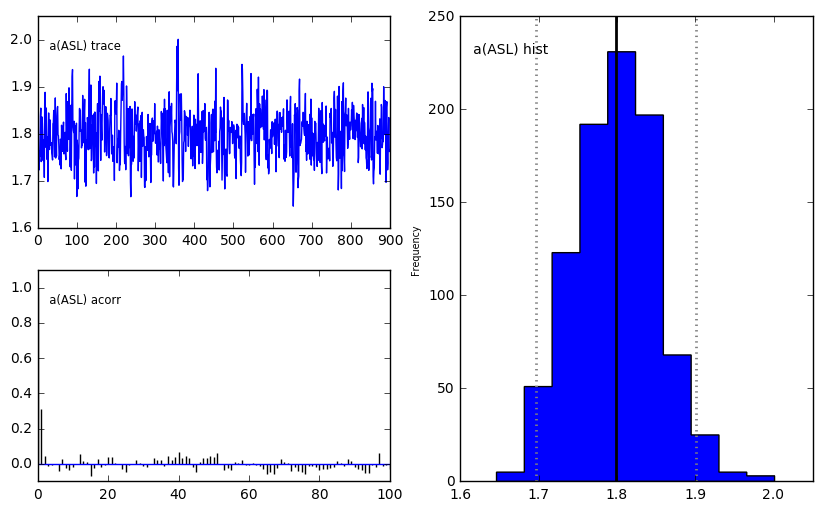

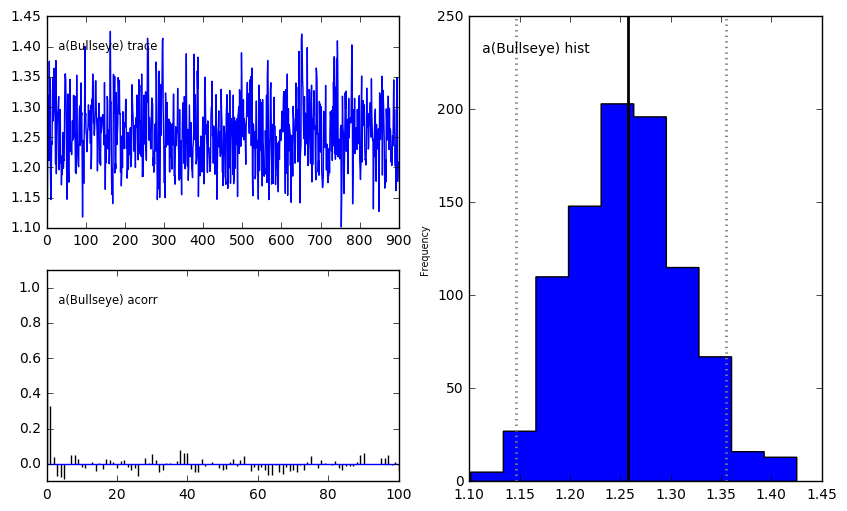

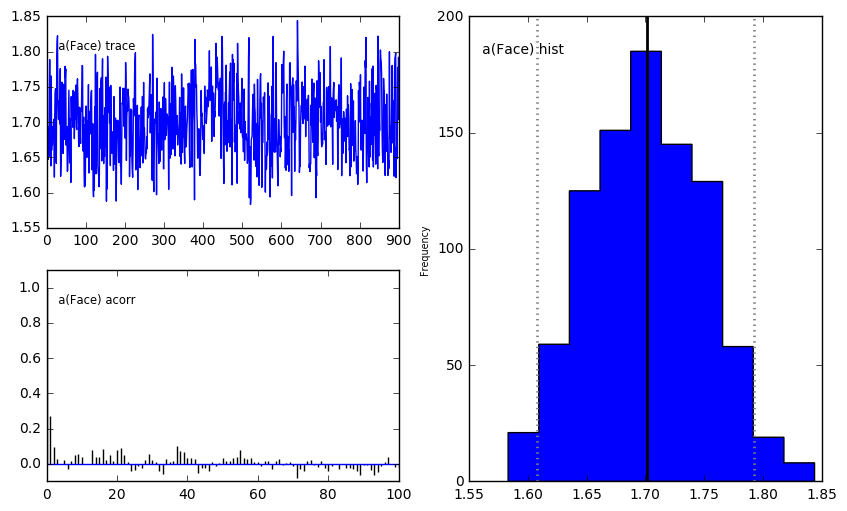

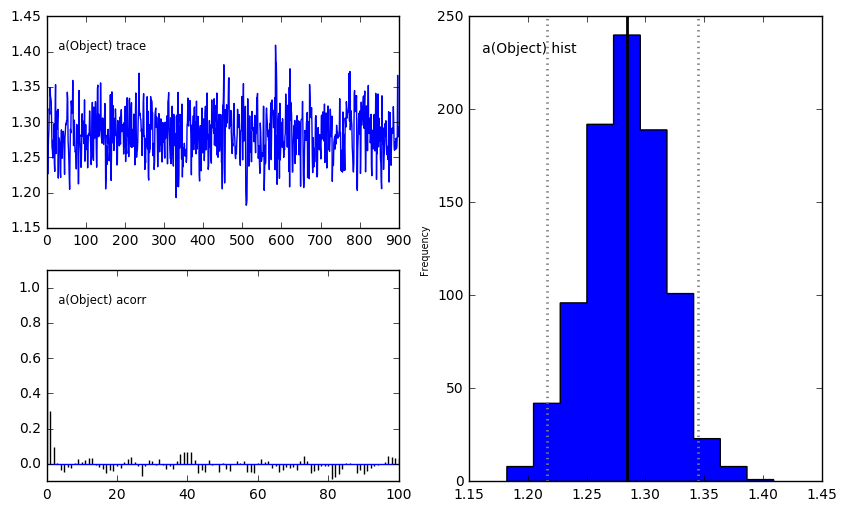

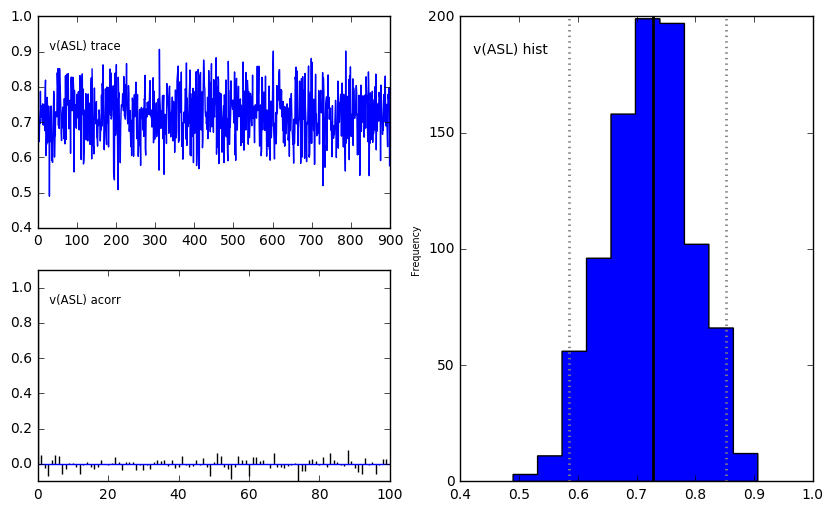

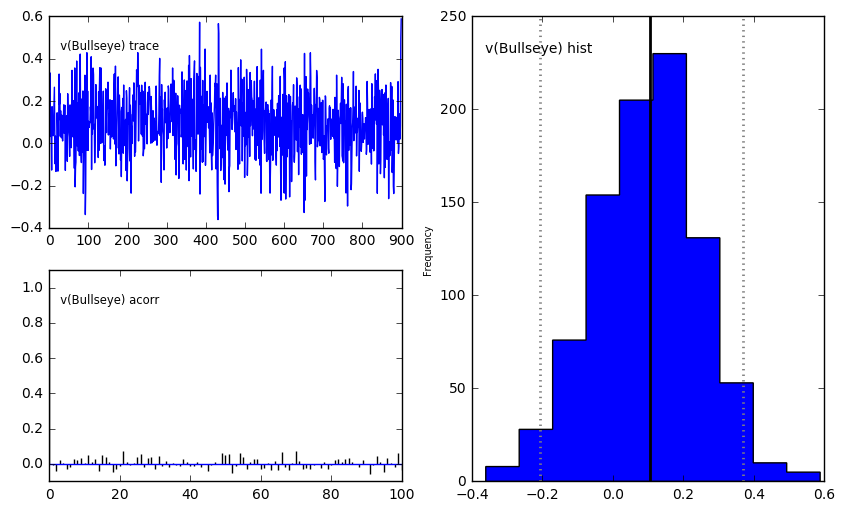

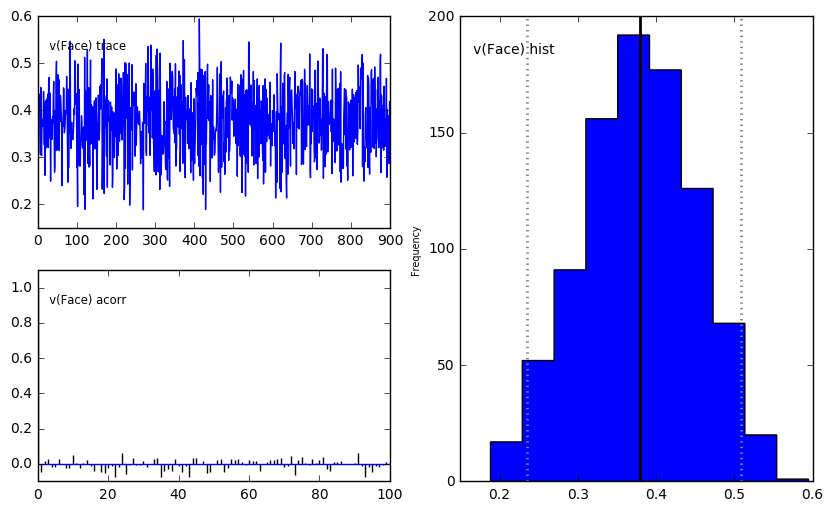

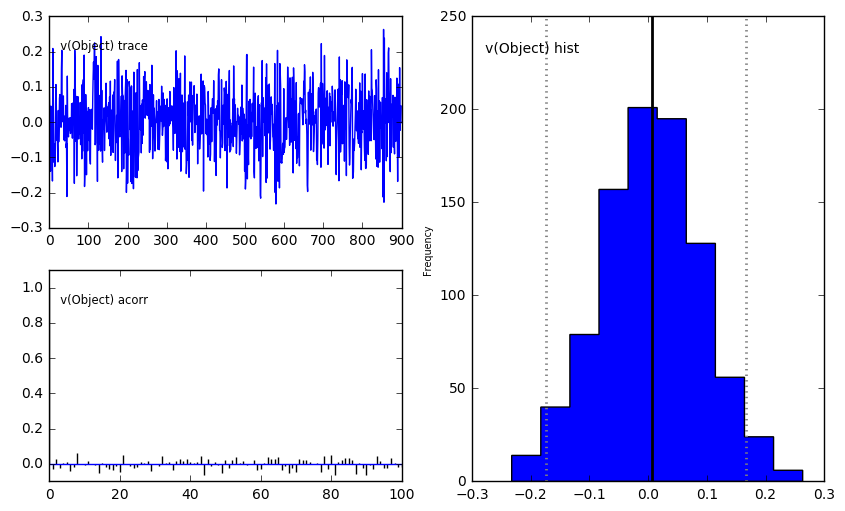

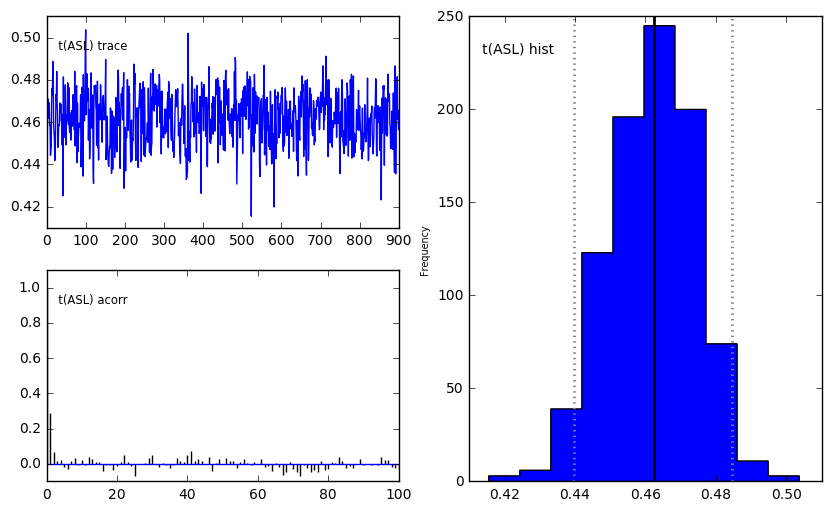

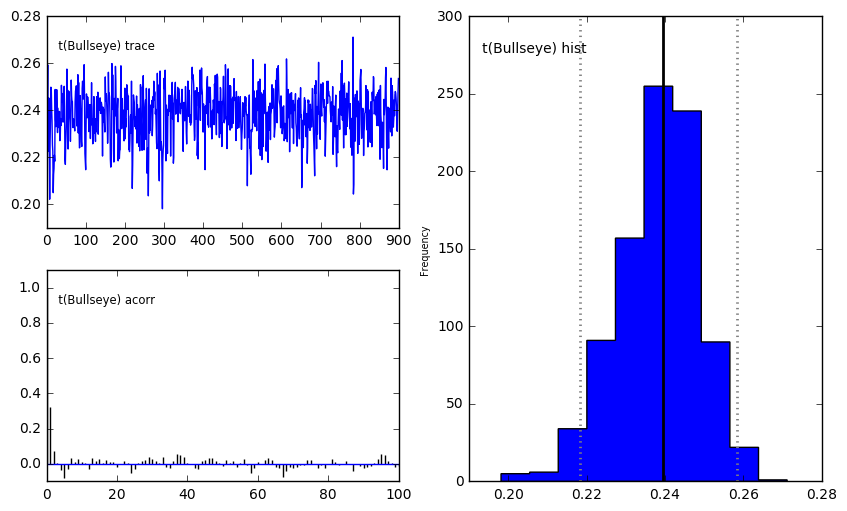

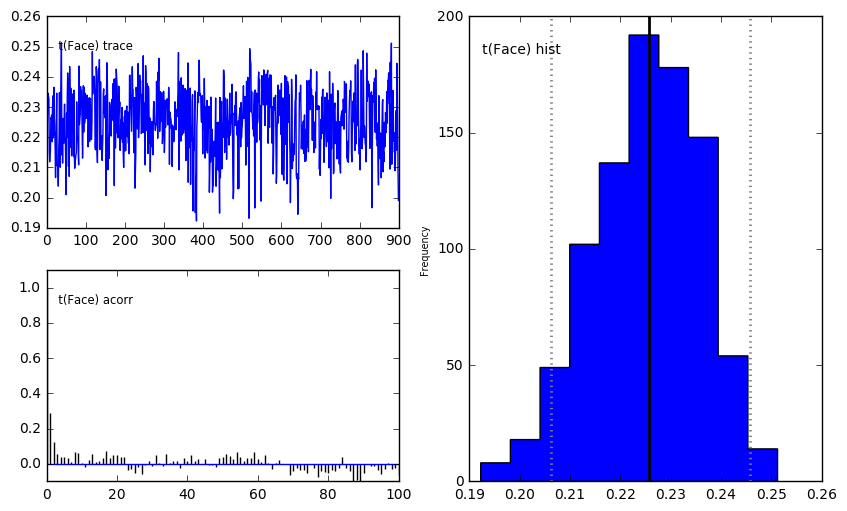

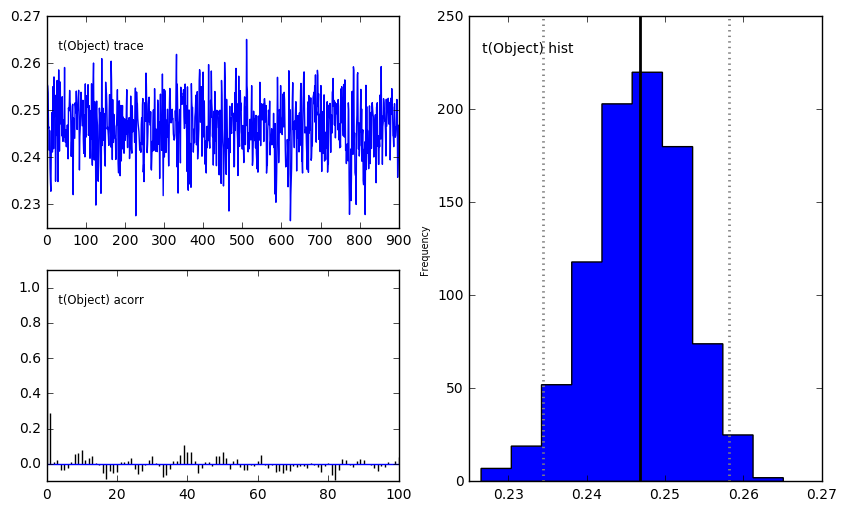

In [109]:
m_group.plot_posteriors()

In [110]:
stats_group_model = m_group.gen_stats()
stats_group_model

/Users/kmacdonald/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


mean         std      2.5q         25q         50q  \
a(ASL)          1.79903   0.0530458   1.69719     1.76019      1.7993   
a(Bullseye)     1.25761   0.0552278   1.15474     1.21802     1.25724   
a(Face)         1.70132   0.0488594   1.60982     1.66481      1.7015   
a(Object)       1.28312   0.0338398   1.21594     1.26092       1.284   
v(ASL)         0.722501   0.0705897   0.58305    0.676007    0.727428   
v(Bullseye)   0.0962127    0.148126 -0.219636 -0.00330363    0.103906   
v(Face)        0.378096   0.0721291   0.23604    0.327565    0.378913   
v(Object)    0.00472957   0.0860734 -0.168302  -0.0535775  0.00654716   
t(ASL)         0.461955   0.0122818  0.438105    0.453315    0.462444   
t(Bullseye)    0.238312   0.0103245   0.21621     0.23214    0.239545   
t(Face)        0.225369   0.0104932  0.203769    0.218301    0.225778   
t(Object)        0.2464  0.00602564  0.233733    0.242465    0.246763   

                  75q     97.5q       mc err  
a(ASL)        1.83483   1.90408   0.00237064  
a(Bullseye)   1.29302   1.37587   0.00215485  
a(Face)       1.73712   1.79614   0.00205674  
a(Object)     1.30587   1.34486   0.00142142  
v(ASL)       0.771691  0.851581   0.00245964  
v(Bullseye)  0.192152  0.363829    0.0049104  
v(Face)      0.431109  0.510148   0.00241634  
v(Object)    0.061939  0.176793   0.00298919  
t(ASL)       0.470823  0.483319  0.000565746  
t(Bullseye)  0.245392  0.256775  0.000421473  
t(Face)      0.233252  0.243957  0.000483571  
t(Object)    0.250694  0.257729  0.000244419

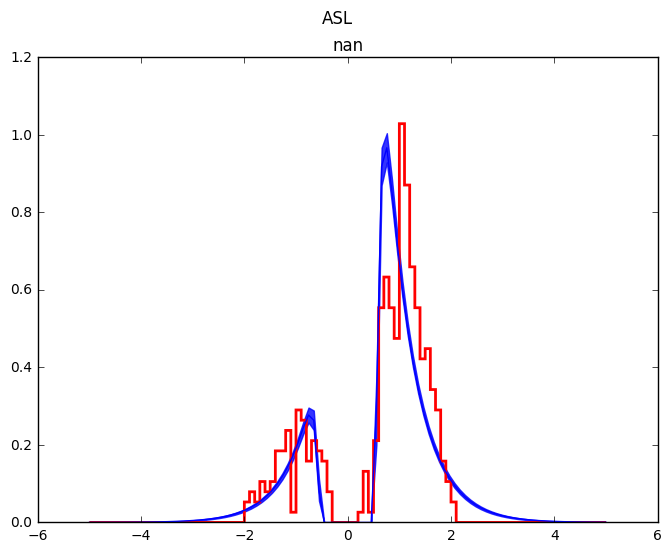

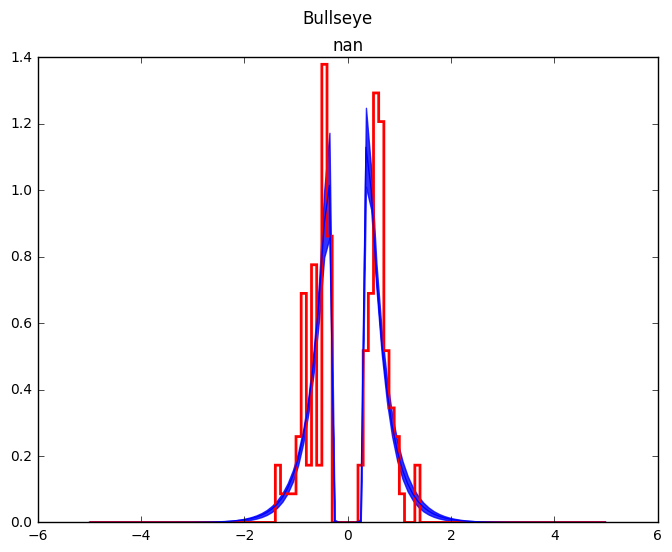

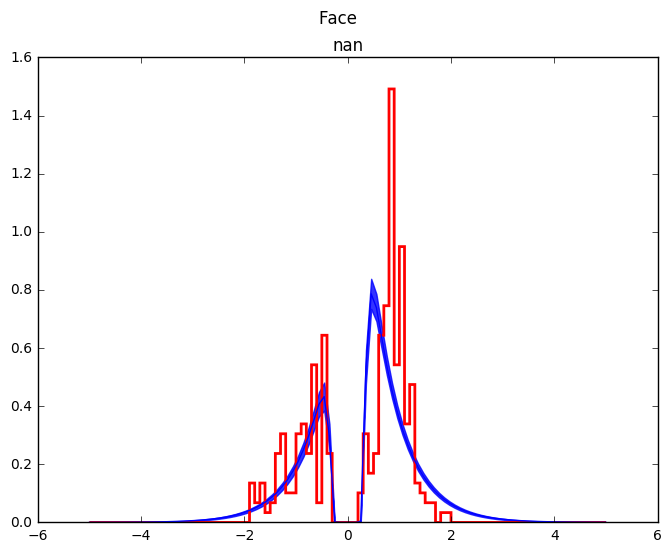

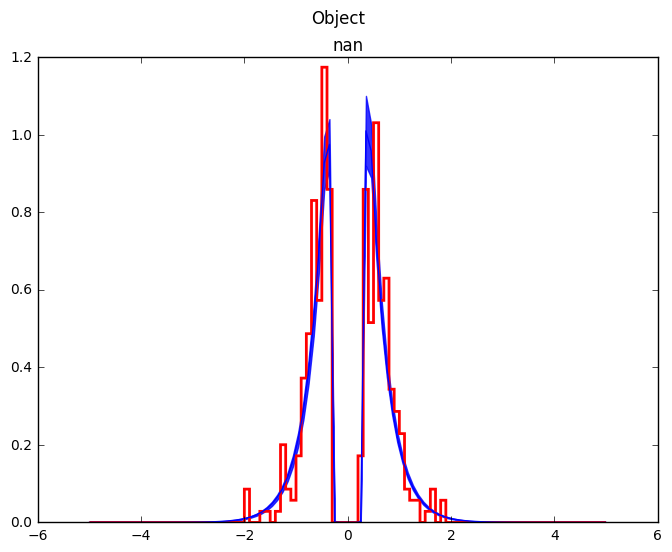

In [113]:
m_group.plot_posterior_predictive()